In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', 100)

In [2]:
# To access other folders
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Handy Functions

**Functions for repetitive tasks.** <br>
(The first parameter is always the DataFrame)

In [3]:
def show_unique_values_in_columns(df, columns):
    for column in columns:
        print(f"({df[column].nunique()}) unique values in '{column}':  {df[column].unique()}\n")

In [4]:
def show_new_columns(df):
    return df.loc[:,'Transported':].head()

In [5]:
def plot_correlation_matrix(df, fig_size):
    df_corr_matrix = pd.get_dummies(df)
    df_corr_matrix['Transported'] = df_corr_matrix.pop('Transported') # move 'Transported' to the last position
    df_corr_matrix = df_corr_matrix.corr()

    plt.figure(figsize=fig_size)
    sns.heatmap(df_corr_matrix, annot=True, fmt=".2f", cmap="icefire", vmin=-1, vmax=1)
    plt.title('Correlation Matrix', fontsize=20)
    plt.xticks(rotation=75)
    plt.show()

In [6]:
def show_missing_values(df):
    print(df.isna().sum()[df.isna().sum() > 0])

# 1. Load and Split `train.csv`

In [7]:
train = pd.read_csv('../data/train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [8]:
# Split -train- into -training- and -validation- (to avoid data leakage)
training, validation = train_test_split(train, stratify=train['Transported'], test_size=0.2, random_state=42)

In [9]:
print(training.shape)
print(validation.shape)

(6954, 14)
(1739, 14)


In [10]:
training.to_csv('../data/training.csv', index=False)
validation.to_csv('../data/validation.csv', index=False) # aside until model validation

# 2. Dataset Overview

In [11]:
df = training.copy()
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3600,3868_04,Earth,False,G/630/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Harrie Braymon,True
1262,1336_01,Earth,True,G/201/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence,False
5075,5422_01,Europa,True,D/164/S,55 Cancri e,26.0,False,0.0,0.0,0.0,NaN,0.0,Pleion Sperap,True
4758,5076_01,Earth,False,G/818/P,TRAPPIST-1e,13.0,False,0.0,0.0,60.0,1.0,5147.0,Alicey Wolferguson,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 3600 to 7925
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6785 non-null   object 
 2   CryoSleep     6786 non-null   object 
 3   Cabin         6793 non-null   object 
 4   Destination   6801 non-null   object 
 5   Age           6815 non-null   float64
 6   VIP           6796 non-null   object 
 7   RoomService   6809 non-null   float64
 8   FoodCourt     6800 non-null   float64
 9   ShoppingMall  6785 non-null   float64
 10  Spa           6804 non-null   float64
 11  VRDeck        6810 non-null   float64
 12  Name          6795 non-null   object 
 13  Transported   6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 767.4+ KB


- All columns have **missing values**.

In [13]:
categorical_columns = df.select_dtypes(exclude=np.number).columns
for column in categorical_columns:
    print(f"({df[column].nunique()}) unique values in '{column}':  {df[column].unique()}\n")

(6954) unique values in 'PassengerId':  ['3868_04' '1336_01' '9193_01' ... '7579_01' '0460_01' '8462_01']

(3) unique values in 'HomePlanet':  ['Earth' 'Europa' 'Mars' nan]

(2) unique values in 'CryoSleep':  [False True nan]

(5435) unique values in 'Cabin':  ['G/630/S' 'G/201/S' 'G/1483/S' ... 'G/1229/S' 'G/65/S' 'F/1629/S']

(3) unique values in 'Destination':  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

(2) unique values in 'VIP':  [False True nan]

(6783) unique values in 'Name':  ['Harrie Braymon' nan 'Camily Howence' ... 'Willy Curton'
 'Shawne Jenningley' 'Maen Klindsey']

(2) unique values in 'Transported':  [ True False]



- We need to perform `Feature Extraction` on 'PassengerId', 'Cabin' and 'Name'.

In [14]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6815.000000,6809.000000,6800.000000,6785.000000,6804.000000,6810.000000
mean,28.683786,230.149508,452.611176,170.033604,308.868460,296.649927
std,14.497439,676.338160,1602.465410,548.753286,1142.118125,1108.581827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,50.000000,65.500000,23.000000,55.000000,42.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,20336.000000


- It seems that all amenity columns have **outliers**.

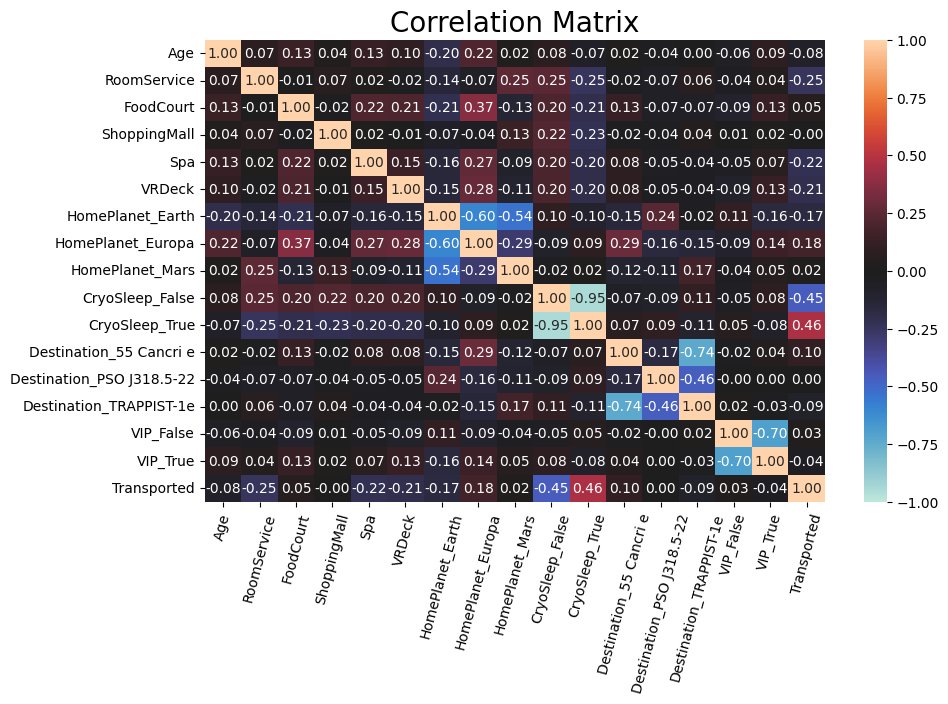

In [15]:
df_corr_matrix = df.drop(columns=['PassengerId', 'Cabin', 'Name']) # drop columns with many unique values
df_corr_matrix = pd.get_dummies(df_corr_matrix)
df_corr_matrix['Transported'] = df_corr_matrix.pop('Transported') # move 'Transported' to the last position
df_corr_matrix = df_corr_matrix.corr()

plt.figure(figsize=(10,6))
sns.heatmap(df_corr_matrix, annot=True, fmt=".2f", cmap="icefire", vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=75)
plt.show()

- No column highly correlated with another column.
- Some columns are low correlated with the target, but we'll keep them until `Feature Engineering`.

Let's see the **Correlation Matrix** again after `Feature Extraction`.

In [16]:
df['Transported'].value_counts(normalize=True)

Transported
True     0.503595
False    0.496405
Name: proportion, dtype: float64

- Balanced dataset.

In [17]:
df.duplicated().sum()

np.int64(0)

# 3. Feature Extraction

This section decomposes 'PassengerId', 'Cabin' and 'Name' into new columns.

## PassengerId
"A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always."

In [18]:
df['PassengerId'].head()

3600    3868_04
1262    1336_01
8612    9193_01
5075    5422_01
4758    5076_01
Name: PassengerId, dtype: object

In [19]:
# Split 'PassengerId' into 2 columns
split = df['PassengerId'].str.split('_').str
df['GroupNumber'] = split[0].astype(int)
df['NumberWithinGroup'] = split[1].astype(int)
df.loc[:,'Transported':].head()

,Transported,GroupNumber,NumberWithinGroup
3600,True,3868,4
1262,True,1336,1
8612,False,9193,1
5075,True,5422,1
4758,False,5076,1


In [20]:
show_unique_values_in_columns(df, ['GroupNumber', 'NumberWithinGroup'])

(5227) unique values in 'GroupNumber':  [3868 1336 9193 ... 7579  460 8462]

(8) unique values in 'NumberWithinGroup':  [4 1 3 2 6 5 7 8]



- 'GroupNumber' has many unique values. We may use it for `Feature Engineering` later, so let's keep it.

In [21]:
# Drop 'PassengerId' since it's no longer needed
df = df.drop(columns='PassengerId')
'PassengerId' in df.columns

False

## Cabin
"The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard."

In [22]:
df['Cabin'].head()

3600     G/630/S
1262     G/201/S
8612    G/1483/S
5075     D/164/S
4758     G/818/P
Name: Cabin, dtype: object

In [23]:
# Split 'Cabin' into 3 columns
split = df['Cabin'].str.split('/').str
df['CabinDeck'] = split[0]
df['CabinNum'] = split[1] # as string because of NaN values
df['CabinSide'] = split[2]
show_new_columns(df)

,Transported,GroupNumber,NumberWithinGroup,CabinDeck,CabinNum,CabinSide
3600,True,3868,4,G,630,S
1262,True,1336,1,G,201,S
8612,False,9193,1,G,1483,S
5075,True,5422,1,D,164,S
4758,False,5076,1,G,818,P


In [24]:
show_unique_values_in_columns(df, ['CabinDeck', 'CabinNum', 'CabinSide'])

(8) unique values in 'CabinDeck':  ['G' 'D' 'F' 'E' 'B' 'C' 'A' nan 'T']

(1745) unique values in 'CabinNum':  ['630' '201' '1483' ... '1321' '610' '1229']

(2) unique values in 'CabinSide':  ['S' 'P' nan]



- 'CabinNum' also has many unique values, let's keep it for `Feature Engineering`.

In [25]:
# Drop 'Cabin' since it's no longer needed
df = df.drop(columns='Cabin')
'Cabin' in df.columns

False

## Name
"The first and last names of the passenger."

In [26]:
df['Name'].head()

3600        Harrie Braymon
1262                   NaN
8612        Camily Howence
5075         Pleion Sperap
4758    Alicey Wolferguson
Name: Name, dtype: object

In [27]:
# Extract just the last names
df['LastName'] = df['Name'].str.split().str[1]
show_new_columns(df)

,Transported,GroupNumber,NumberWithinGroup,CabinDeck,CabinNum,CabinSide,LastName
3600,True,3868,4,G,630,S,Braymon
1262,True,1336,1,G,201,S,NaN
8612,False,9193,1,G,1483,S,Howence
5075,True,5422,1,D,164,S,Sperap
4758,False,5076,1,G,818,P,Wolferguson


In [28]:
show_unique_values_in_columns(df, ['LastName'])

(2123) unique values in 'LastName':  ['Braymon' nan 'Howence' ... 'Higast' 'Boyst' 'Freednal']



- Many unique values too, but let's keep it.

In [29]:
# Drop 'Name' since it's no longer needed
df = df.drop(columns='Name')
'Name' in df.columns

False

## Testing `custom_preprocessing.py`

I created a Python file to replicate all the preprocessing steps done here, so we can build a custom pipeline for preprocessing.

In [30]:
# Check if the processes performed here are the same as those created in the Python file
from utils.custom_preprocessing import FeatureExtraction

pipeline = Pipeline([
    ('feature_extraction', FeatureExtraction())
])

df_pipeline = pipeline.fit_transform(training.copy())
df_pipeline.equals(df)

True

# 4. Handle Missing Values

Considering that the columns have few missing values (~3%):
- We will to try to properly impute columns that are highly correlated with the target, because wrong information on them could impact negatively the model.
- Low correlated columns we'll try to impute with some measure of central tendency, so that rows with valid information in the highly correlated columns are preserved.

In [31]:
df.isna().sum()[df.isna().sum() > 0]

HomePlanet      169
CryoSleep       168
Destination     153
Age             139
VIP             158
RoomService     145
FoodCourt       154
ShoppingMall    169
Spa             150
VRDeck          144
CabinDeck       161
CabinNum        161
CabinSide       161
LastName        159
dtype: int64

Let's check the `Correlation Matrix` again, now with the new columns.

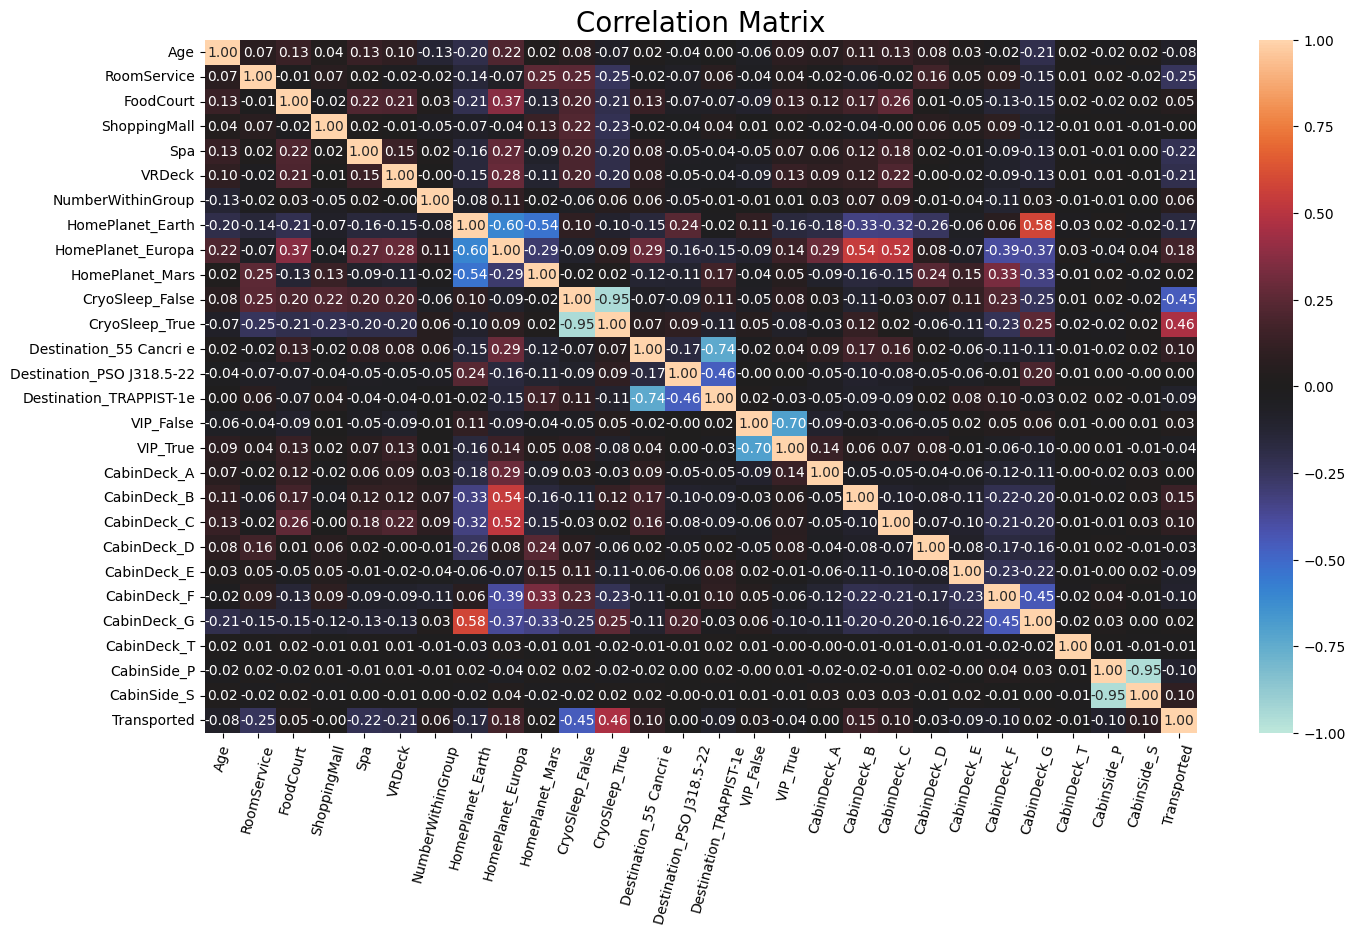

In [32]:
plot_correlation_matrix(df.drop(columns=['GroupNumber', 'CabinNum', 'LastName']), fig_size=(16,9)) # need to drop columns with many unique values

- The only column "highly" correlated with the target is 'CryoSleep'.
    - We will try to impute NaN values in 'CryoSleep' based on the amenities. Otherwise, we'll drop the rows.
- For NaN in amenities, we can impute based on 'CryoSleep' and a measure of central tendency.
- Other columns we'll impute using a measure of central tendency.
    - There's a significant correlation between 'HomePlanet' and 'CabinDeck'. We may impute based on it.
        - (HomePlanet = Earth) has positive correlation with (CabinDeck = G).
        - (HomePlanet = Europa) has positive correlation with (CabinDeck = A, B, C).
        - (HomePlanet = Mars) has positive correlation with (CabinDeck = D, E, F).

## CryoSleep
"Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins."

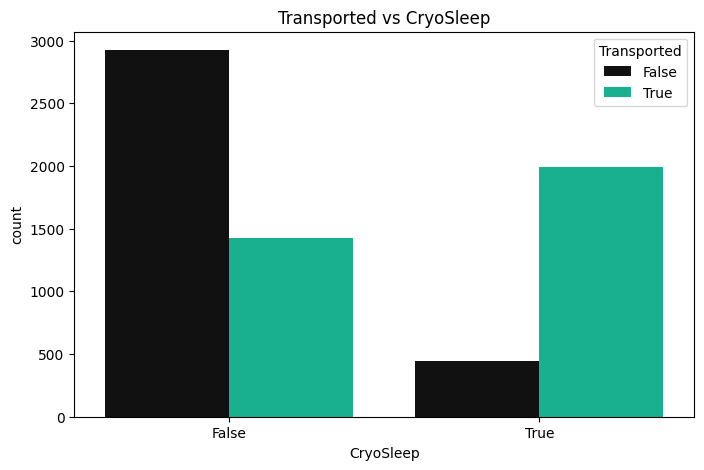

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='CryoSleep', hue='Transported', palette=["#111", "#00C99D"])
plt.title(f'Transported vs {'CryoSleep'}')
plt.show()

- Passengers who were asleep tended to be transported.

**First, let's check if all passengers who were awake actually spent on amenities and vice versa.**

In [34]:
df_spent_on_amenity = df.query("(RoomService > 0) | (FoodCourt > 0) | (ShoppingMall > 0) | (Spa > 0) | (VRDeck > 0)")
df_spent_on_amenity['CryoSleep'].value_counts()

CryoSleep
False    3921
Name: count, dtype: int64

- **All** passengers who **spent** on at least one amenity were **awake** (CryoSleep = False).

In [35]:
df_no_spent_on_amenity = df.query("~((RoomService > 0) | (FoodCourt > 0) | (ShoppingMall > 0) | (Spa > 0) | (VRDeck > 0))")
df_no_spent_on_amenity['CryoSleep'].value_counts()

CryoSleep
True     2436
False     429
Name: count, dtype: int64

- **Not all** passengers who **didn't spend** on any amenity were **asleep** (CryoSleep = True). Let's analyze them further.

In [36]:
df_no_spent_on_amenity.sample(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,NumberWithinGroup,CabinDeck,CabinNum,CabinSide,LastName
3684,Earth,True,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,3959,3,G,646,P,Sullones
8457,Europa,True,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,9034,1,D,288,P,Crakete
7463,Mars,False,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,True,7984,4,F,1653,P,Birt
1108,Earth,True,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,0.0,True,1174,1,G,176,P,Lessonerry
7200,Europa,False,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,True,7693,2,B,252,P,Roftfuling
350,Earth,False,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,384,1,G,56,S,Simpsonks
1379,Europa,True,TRAPPIST-1e,70.0,False,0.0,0.0,0.0,0.0,0.0,True,1452,2,NaN,NaN,NaN,Distured
7024,Mars,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,True,7479,1,F,1429,S,Berte
2402,Earth,NaN,PSO J318.5-22,21.0,False,0.0,0.0,NaN,0.0,0.0,False,2584,1,G,417,P,Woodwardy
4188,Europa,True,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,True,4469,1,B,146,P,Brakeded


- The only column that seems relevant is 'Age'. Let's analyze it further.

In [37]:
df_no_spent_on_amenity[df_no_spent_on_amenity['Age'] >= 18]['CryoSleep'].value_counts()

CryoSleep
True     1782
False      84
Name: count, dtype: int64

In [38]:
df_no_spent_on_amenity[df_no_spent_on_amenity['Age'] < 18]['CryoSleep'].value_counts()

CryoSleep
True     592
False    338
Name: count, dtype: int64

- Some passengers under 18 who didn't spend on amenities were awake and others were asleep. For those who were awake and didn't spend, we can assume that their parents paid for them.
    - Based on the passengers that spent on amenity, let's see the age that is certain they didn't spend.

In [39]:
df_spent_on_amenity['Age'].min()

np.float64(13.0)

- Children with **Age < 13** don't spend on amenity, which indicates that their parents paid for them. **It can be relevant when imputing amenities.**

In [40]:
df_no_spent_on_amenity[df_no_spent_on_amenity['Age'] < 13]['CryoSleep'].value_counts()

CryoSleep
False    333
True     314
Name: count, dtype: int64

In [41]:
df_no_spent_on_amenity[df_no_spent_on_amenity['Age'] >= 13]['CryoSleep'].value_counts()

CryoSleep
True     2060
False      89
Name: count, dtype: int64

- When passengers **don't spend** and they are **under 13 yo**, we **can't guarantee** that they were awake or asleep. But when they **don't spend** and are **over 13 yo**, we **can assume** that they were **asleep** (89 didn't spend while awake and 2060 didn't spend while asleep).

---

`According to our analysis, all passengers who spent were awake.` <br>
Let's impute **CryoSleep = False** for passengers who **spent** on at least one amenity.

In [42]:
indexes = df.query("(RoomService > 0) | (FoodCourt > 0) | (ShoppingMall > 0) | (Spa > 0) | (VRDeck > 0)").index
df.loc[indexes, 'CryoSleep'] = df.loc[indexes, 'CryoSleep'].fillna('False')
show_missing_values(df)

HomePlanet      169
CryoSleep        82
Destination     153
Age             139
VIP             158
RoomService     145
FoodCourt       154
ShoppingMall    169
Spa             150
VRDeck          144
CabinDeck       161
CabinNum        161
CabinSide       161
LastName        159
dtype: int64


`According to our analysis, not all passengers who did't spend were asleep.` <br>
Let's impute **CryoSleep = True** for those who **didn't spend** and are **>= 13 years old**.

In [43]:
indexes = df.query("~((RoomService > 0) | (FoodCourt > 0) | (ShoppingMall > 0) | (Spa > 0) | (VRDeck > 0)) and (Age >= 13)").index
df.loc[indexes, 'CryoSleep'] = df.loc[indexes, 'CryoSleep'].fillna('True')
show_missing_values(df)

HomePlanet      169
CryoSleep        18
Destination     153
Age             139
VIP             158
RoomService     145
FoodCourt       154
ShoppingMall    169
Spa             150
VRDeck          144
CabinDeck       161
CabinNum        161
CabinSide       161
LastName        159
dtype: int64


For the remaining NaN values, let's **drop the rows**.

In [44]:
df = df.dropna(subset='CryoSleep')
show_missing_values(df)

HomePlanet      169
Destination     152
Age             139
VIP             156
RoomService     145
FoodCourt       153
ShoppingMall    168
Spa             149
VRDeck          141
CabinDeck       160
CabinNum        160
CabinSide       160
LastName        159
dtype: int64


---

In [45]:
# Check if the processes performed here are the same as those created in the Python file
from utils.custom_preprocessing import CryoSleep

pipeline = Pipeline([
    ('feature_extraction', FeatureExtraction()),
    ('cryo_sleep', CryoSleep())
])

df_pipeline = pipeline.fit_transform(training.copy())
df_pipeline.equals(df)

True